# Simulation von Übertragungsfunktion
https://docs.sympy.org/latest/modules/physics/control/control.html

## Übertragungsfunktionen

In [1]:
from sympy import *
from sympy.abc import s
from sympy.physics.control.lti import TransferFunction

In [2]:
K=0.178
T=0.0265
G1= TransferFunction(K, 1+T*s, s)
display(G1)

TransferFunction(0.178, 0.0265*s + 1, s)

## Grafische Darstellung
### [Bodediagramm](https://docs.sympy.org/latest/modules/physics/control/control_plots.html#bode-plot)

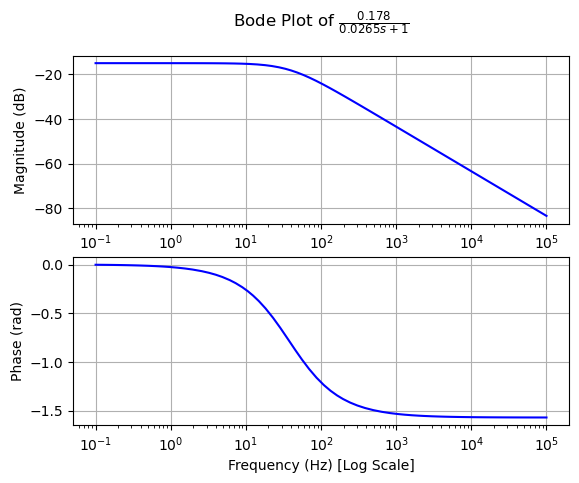

In [3]:
from sympy.physics.control.control_plots import bode_plot
bode_plot(G1, initial_exp=-1, final_exp=5)  

### Impulsantwortantwort
[Impuls response](https://docs.sympy.org/latest/modules/physics/control/control_plots.html#impulse-response-plot)  
Zeigt den Ausgang wenn am Eingang ein Dirac-Impuls angelegt wird. Vergleichbar mit dem Schlag des Klöppels auf die Glocke.

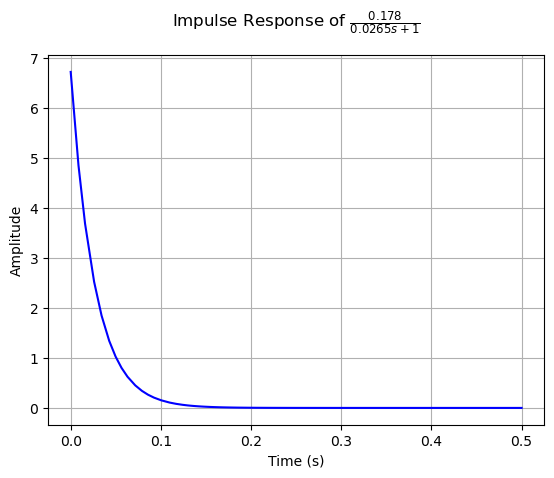

In [4]:
from sympy.physics.control.control_plots import impulse_response_plot
impulse_response_plot(G1,upper_limit=0.5)
    

### Sprungantwort
[Step response](https://docs.sympy.org/latest/modules/physics/control/control_plots.html#step-response-plot)

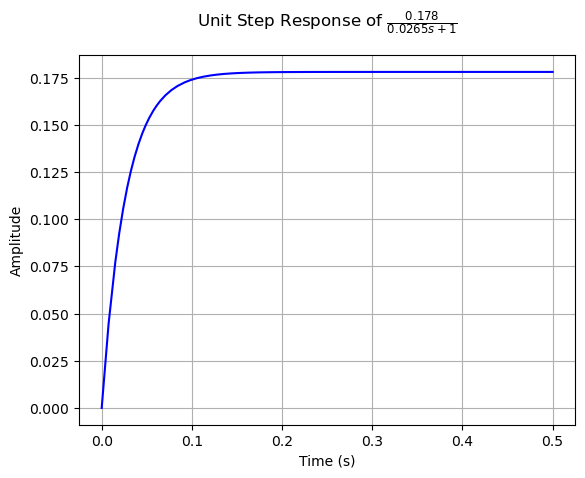

In [5]:
from sympy.physics.control.control_plots import step_response_plot, step_response_numerical_data
step_response_plot(G1,upper_limit=0.5)   

## Vergleich mit den Messdaten

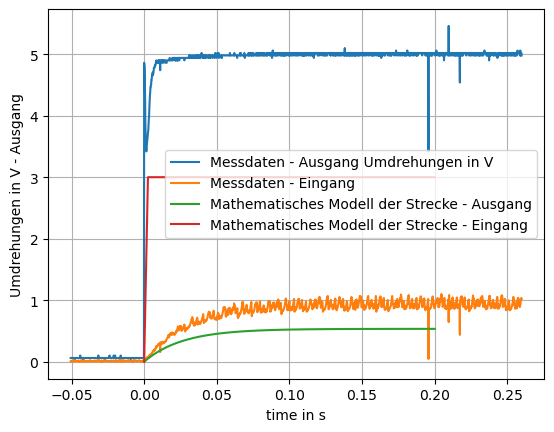

In [30]:
import matplotlib.pyplot as plt
import numpy as np

Sprung_Endwert = 3 # Wie hoch ist der Sprung

# daten des mathematisches Modell plotten
dataSim = step_response_numerical_data(G1,upper_limit=0.2)


#Messdaten importieren
import pandas as pd
#Von Digilent
#df = pd.read_csv('3V.csv',header=10) # Hier müssen eventuell einstellungen gemacht werden um Messdaten aus unterscheidlichen Quellen korrekt zu lesen

#Von Tektronix
df = pd.read_csv('TEK00003.csv',encoding='ansi',header=14)


df.columns = ['time', 'channel1', 'channel2'] # Spalten umbenennen für vereinfachte programmierung

#df.channel1 = df.channel1.rolling(window=100).mean() #Gleitender Mittelwert

# Daten plotten
plt.plot(df.time,df.channel1,label='Messdaten - Ausgang Umdrehungen in V')
plt.plot(df.time,df.channel2,label='Messdaten - Eingang')
plt.plot(dataSim[0],[item * Sprung_Endwert for item in dataSim[1]],label='Mathematisches Modell der Strecke - Ausgang')
plt.plot(dataSim[0],Sprung_Endwert*np.sign(dataSim[0]),label='Mathematisches Modell der Strecke - Eingang')
plt.legend()
plt.xlabel('time in s')
plt.ylabel('Umdrehungen in V - Ausgang')
plt.grid()
plt.show()


In [28]:

df

,TIME,CH1,CH2
0,-0.05056,0.06,0.004
1,-0.05040,0.06,0.012
2,-0.05024,0.06,0.012
3,-0.05008,0.06,0.012
4,-0.04992,0.06,0.004
...,...,...,...
1936,0.25920,4.98,0.972
1937,0.25940,5.02,0.996
1938,0.25950,5.02,1.028
1939,0.25970,5.02,1.036


In [16]:
df

,Vertical Units,V,V.1
0,Vertical Offset,0,0
1,Vertical Scale,1,0.2
2,Label,NaN,NaN
3,TIME,CH1,CH2
4,-5.056e-02,0.0599999,0.00399998
...,...,...,...
1963,÷Î4eç` I‘–XUŽÖ ß½,Š©ãWXŠ^8M%„_,NaN
1964,f$\ _èò36t}<?¶[‘' €Ü,Û™=˜>¸0ò…¨%ž€Ï6h,NaN
1965,ür™,NaN,NaN
1966,†óÎ2þÿ1 ” }YJo3è¨r;“G…Wý‚?¾,NaN,NaN
